In [1]:
from syllog_model import SyllogPyroModel

In [2]:
with open('scale.json', 'r') as jsonfile:
    cyjson=jsonfile.read().replace('\n', '')

In [3]:
model = SyllogPyroModel.from_cyjson(cyjson)

In [4]:
model.plot_graph('scale.png')

In [5]:
model.get_factor_descriptions()

{'b': {'fn': 'Normal', 'inputs': ['mu', 'sigma'], 'outputs': ['N']},
 'd': {'fn': 'Normal', 'inputs': ['mu', 'sigma'], 'outputs': ['N']}}

In [6]:
model.get_evidence_nodes()

['guess', 'weight_var', 'measure_var']

In [7]:
import pyro.distributions as dist
import pyro
import torch

In [11]:
def Normal(_name, mu, sigma):
    return {'N': pyro.sample(_name, dist.Normal(mu, sigma)) }
def Bernoulli(_name, p):
    return {'t': pyro.sample(_name, dist.Bernoulli(p)) }
def CategoricalOutcome(_name, outcome_mat, category):
    return { 'i': outcome_mat[torch.tensor(category).int()] }

factor_functions = { 'Normal': Normal, 'Bernoulli': Bernoulli, 'CategoricalOutcome': CategoricalOutcome }

In [21]:
def scale(guess):
    evidence = {'guess': guess, 'weight_var': 1., 'measure_var': 0.75}
    return model(evidence, factor_functions)['measurement']

In [22]:
samples = [scale(1.2) for i in range(100)]

In [23]:
import matplotlib.pyplot as plt

(array([ 2.,  0.,  0.,  0.,  0.,  2.,  1.,  2.,  4.,  5., 15., 12.,  4.,
         8., 12., 13., 17., 26., 25., 34., 32., 42., 44., 41., 56., 49.,
        45., 44., 47., 42., 56., 39., 37., 32., 39., 29., 21., 18., 27.,
         9., 18., 10., 14.,  7.,  4.,  6.,  4.,  1.,  0.,  5.]),
 array([-2.7712884 , -2.6266856 , -2.4820828 , -2.33748   , -2.1928773 ,
        -2.0482743 , -1.9036716 , -1.7590687 , -1.614466  , -1.4698632 ,
        -1.3252604 , -1.1806575 , -1.0360547 , -0.89145195, -0.7468491 ,
        -0.60224634, -0.45764354, -0.31304073, -0.16843791, -0.02383512,
         0.12076769,  0.2653705 ,  0.4099733 ,  0.5545761 ,  0.69917893,
         0.8437817 ,  0.9883845 ,  1.1329873 ,  1.2775902 ,  1.4221929 ,
         1.5667957 ,  1.7113985 ,  1.8560014 ,  2.0006042 ,  2.145207  ,
         2.2898097 ,  2.4344125 ,  2.5790153 ,  2.7236183 ,  2.868221  ,
         3.0128238 ,  3.1574266 ,  3.3020294 ,  3.4466321 ,  3.591235  ,
         3.7358377 ,  3.8804407 ,  4.0250435 ,  4.1696463 ,

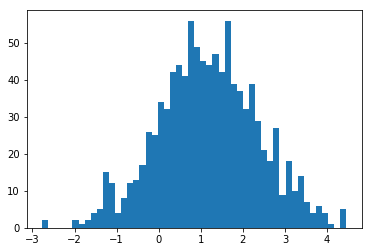

In [24]:
plt.hist(samples, bins=50)

In [25]:
posterior = pyro.infer.Importance(scale, num_samples = 100)

In [29]:
guess = 8.5
marginal = pyro.infer.EmpiricalMarginal(posterior.run(guess))
print(marginal())

tensor(5.8351)


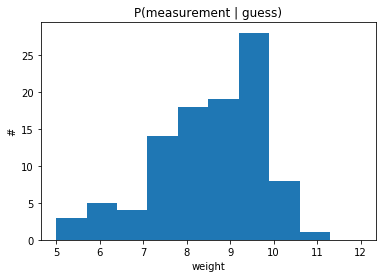

In [30]:
plt.hist([marginal().item() for _ in range(100)], range=(5.0, 12.0))
plt.title("P(measurement | guess)")
plt.xlabel("weight")
plt.ylabel("#");